### 1- Dataset acquisition 
Dataset link : https://www.kaggle.com/datasets/prithwirajmitra/covid-face-mask-detection-dataset

Contains two classes : Without mask and with mask 

### 2- Training - Sequential Model

In [31]:
##importing modules 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf 
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
train_dir = "Dataset/Train/"
test_dir = "Dataset/Test/"
validation_dir = "Dataset/Validation/"
classes_ = ["Mask","Non Mask"]

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

validation_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)
validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [5]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16,input_shape=(224,224,3), activation='relu', kernel_size=(3,3)),
      tf.keras.layers.AveragePooling2D((2,2)),
      tf.keras.layers.Conv2D(32, activation='relu', kernel_size=(3,3)),
      tf.keras.layers.AveragePooling2D((2,2)),
      tf.keras.layers.Conv2D(64, activation='relu', kernel_size=(3,3)),
      tf.keras.layers.AveragePooling2D((2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)
history = model.fit(
    train_generator,
    batch_size=64,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[callback])

C:\Users\srich\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\srich\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
19/19 [==============================] - 31s 2s/step - loss: 72.5521 - binary_accuracy: 0.5333 - false_negatives: 122.0000 - val_loss: 0.8154 - val_binary_accuracy: 0.5196 - val_false_negatives: 145.0000
Epoch 2/20
19/19 [==============================] - 27s 1s/step - loss: 0.5959 - binary_accuracy: 0.6900 - false_negatives: 139.0000 - val_loss: 0.4626 - val_binary_accuracy: 0.8268 - val_false_negatives: 22.0000
Epoch 3/20
19/19 [==============================] - 28s 1s/step - loss: 0.4224 - binary_accuracy: 0.8433 - false_negatives: 50.0000 - val_loss: 0.4753 - val_binary_accuracy: 0.7647 - val_false_negatives: 27.0000
Epoch 4/20
19/19 [==============================] - 27s 1s/step - loss: 0.4433 - binary_accuracy: 0.8283 - false_negatives: 49.0000 - val_loss: 0.4568 - val_binary_accuracy: 0.7843 - val_false_negatives: 16.0000
Epoch 5/20
19/19 [==============================] - 27s 1s/step - loss: 0.4273 - binary_accuracy: 0.8150 - false_negatives: 63.0000 - val_loss: 0.40

dict_keys(['loss', 'binary_accuracy', 'false_negatives', 'val_loss', 'val_binary_accuracy', 'val_false_negatives'])


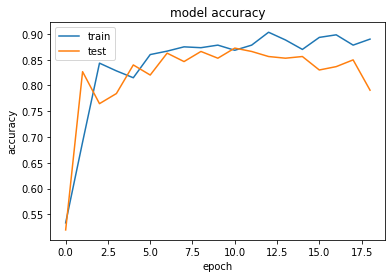

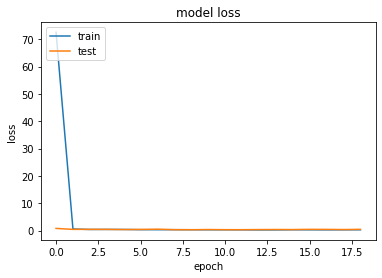

In [7]:
print(history.history.keys())
# summarize history for accuracy

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

Confusion Matrix


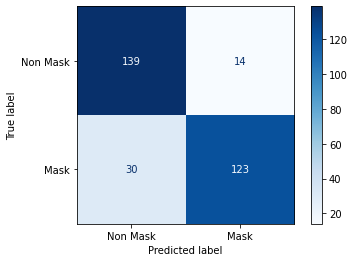

In [9]:
img_width=224
img_height=224
images = []
for folder in os.listdir(validation_dir):
    folder = os.path.join(validation_dir,folder)
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img = image.load_img(img, target_size=(img_width, img_height))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
y_pred=[]
for i,v in enumerate(classes):
    if (v>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Mask','Mask'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [10]:

print('Classification Report')
target_names = ['Non Mask','Mask']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Non Mask       0.82      0.91      0.86       153
        Mask       0.90      0.80      0.85       153

    accuracy                           0.86       306
   macro avg       0.86      0.86      0.86       306
weighted avg       0.86      0.86      0.86       306



In [59]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save('fmdseq.h5')

### Training - Mobilenetv2 Model

In [2]:
import os
import cv2
import numpy as np
import random
import keras

from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [3]:
img_width=224
img_height=224

# initialize the initial learning rate, number of epochs to train for, and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
train_data_dir="Dataset/Train"
test_data_dir="Dataset/Validation"
all_train_imagePaths = list(paths.list_images(train_data_dir))
all_test_imagePaths = list(paths.list_images(test_data_dir))
train_data = []
train_labels = []
test_data = []
test_labels = []

for imagePath in all_train_imagePaths:
# extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

	# load the input image (224x224) and preprocess it
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

	# update the data and labels lists, respectively
    train_data.append(image)
    train_labels.append(label)
for imagePath in all_test_imagePaths:
# extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

	# load the input image (224x224) and preprocess it
    image = load_img(imagePath, target_size=(224, 224))

    image = img_to_array(image)
    image = preprocess_input(image)

	# update the data and labels lists, respectively
    test_data.append(image)
    test_labels.append(label)

In [4]:
def convert_data_labels(data,labels):
  #convert the data and labels to NumPy arrays
    data = np.array(data, dtype="float32")
    labels = np.array(labels)

  # perform one-hot encoding on the labels
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    labels = to_categorical(labels)
    return  data,labels

In [5]:
train_data,train_labels = convert_data_labels(train_data,train_labels)
test_data,test_labels = convert_data_labels(test_data,test_labels)
print("Size of train dataset : ",train_data.shape[0])

print("Size of test dataset : ",test_data.shape[0])

Size of train dataset :  600
Size of test dataset :  306


In [6]:
train_datagen = ImageDataGenerator(
                  rotation_range=20,
                  zoom_range=0.15,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.15,
                  horizontal_flip=True,
                  fill_mode="nearest")

train_generator = train_datagen.flow(train_data, train_labels, batch_size=BS)

In [7]:
mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [8]:
headModel = mobilenet.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [36]:
mnmodel = Model(inputs=mobilenet.input, outputs=headModel)
# compile our model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
mnmodel.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Done !!")
mnmodel.summary()

[INFO] compiling model...
Done !!
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
__________________________________________________________

In [10]:
for layer in mobilenet.layers:
	layer.trainable = False

In [11]:
from datetime import datetime
def timer(start_time= None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour,tmin,round(tsec,2)))
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True)

# ModelCheckPoint
checkPoint = keras.callbacks.ModelCheckpoint(filepath="fmd.h5",
                             monitor='val_loss',
                             mode='auto',
                             save_best_only=True,
                             verbose=1)

# ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# TBoard = tf.keras.callbacks.TensorBoard(log_dir='./logs')
callbacks = [earlystop , checkPoint, learning_rate_reduction]

In [18]:
start_time=timer(None)
classifier = mnmodel.fit(
    train_datagen.flow(train_data, train_labels, batch_size=BS), 
    epochs=EPOCHS,
    validation_data=(test_data,test_labels),
    validation_steps=len(test_data)//BS,
    steps_per_epoch=len(train_data)//BS,
    callbacks=callbacks
)
timer(start_time)


Epoch 1/20
18/18 [==============================] - 88s 5s/step - loss: 0.0090 - accuracy: 0.9982 - val_loss: 0.2351 - val_accuracy: 0.9379

Epoch 00001: val_loss improved from 0.24301 to 0.23505, saving model to fmd.h5


C:\Users\srich\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
18/18 [==============================] - 78s 4s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2227 - val_accuracy: 0.9379

Epoch 00002: val_loss improved from 0.23505 to 0.22274, saving model to fmd.h5
Epoch 3/20
18/18 [==============================] - 92s 5s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2103 - val_accuracy: 0.9379

Epoch 00003: val_loss improved from 0.22274 to 0.21033, saving model to fmd.h5

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 4/20
18/18 [==============================] - 95s 5s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.1977 - val_accuracy: 0.9379

Epoch 00004: val_loss improved from 0.21033 to 0.19771, saving model to fmd.h5
Epoch 5/20
18/18 [==============================] - 83s 5s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.1862 - val_accuracy: 0.9510

Epoch 00005: val_loss improved from 0.19771 to 0.18620, saving model to fmd.h5
Epoch 6/20
18/18 [==============================] - 81s

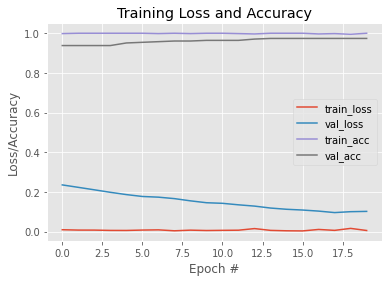

In [37]:
# plot the training loss and accuracy
plt.style.use("ggplot")
N = 20 # epochs number
plt.figure()
plt.plot( classifier.history["loss"], label="train_loss")
plt.plot( classifier.history["val_loss"], label="val_loss")
plt.plot( classifier.history["accuracy"], label="train_acc")
plt.plot( classifier.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [39]:
print("[INFO] evaluating network...")
predIdxs = mnmodel.predict(test_data, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)
val_loss,val_acc = mnmodel.evaluate(test_data,test_labels)

print("Accuracy is : ",val_acc)

print("Loss is : ",val_loss)


[INFO] evaluating network...
10/10 [==============================] - 7s 737ms/step - loss: 0.1015 - accuracy: 0.9739
Accuracy is :  0.9738562107086182
Loss is :  0.10149619728326797


In [33]:
print(classification_report(test_labels.argmax(axis=1), predIdxs))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       153
           1       0.95      1.00      0.97       153

    accuracy                           0.97       306
   macro avg       0.98      0.97      0.97       306
weighted avg       0.98      0.97      0.97       306



Confusion Matrix


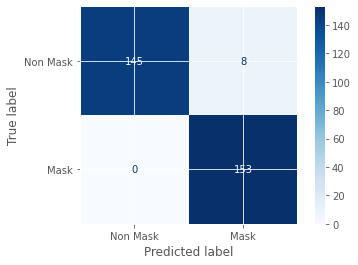

In [44]:
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay
print('Confusion Matrix')
cm = confusion_matrix(test_labels.argmax(axis=1),predIdxs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Mask','Mask'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### We trained 2 models Sequential and mobilenetV2

Mobilenetv2 achieved the highest accuracy (97%)

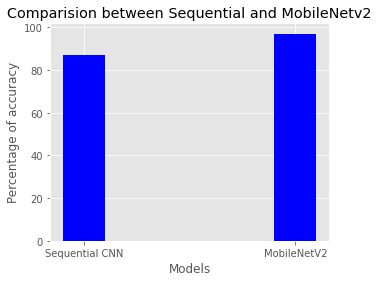

In [50]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Sequential CNN':87, 'MobileNetV2':97}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 4))
 
# creating the bar plot
plt.bar(models, values, color ='blue',
        width = 0.2)
 
plt.xlabel("Models")
plt.ylabel("Percentage of accuracy")
plt.title("Comparision between Sequential and MobileNetv2")
plt.show()